In [5]:
import pandas as pd 
import numpy as np 

In [6]:
df = pd.read_csv('/Users/efeemirhandogan/Documents/AIN429/project/remote_work_productivity.csv')
df.head()

,Employee_ID,Age,Years_Experience,WFH_Days_Per_Week,Gender,Education_Level,Marital_Status,Has_Children,Location_Type,Department,...,Quality_Score,Innovation_Score,Efficiency_Rating,Meetings_Per_Week,Commute_Time_Minutes,Job_Satisfaction,Stress_Level,Work_Life_Balance,Survey_Date,Response_Quality
0,EMP0001,39,10,2,Female,Associate Degree,Married,Yes,Urban,Product,...,58.1,52.1,72.1,4,48,55.9,6,8,2024-04-05,Medium
1,EMP0002,33,4,5,Female,Master Degree,Married,No,Urban,Customer Success,...,93.3,77.9,89.5,12,0,96.1,3,8,2024-01-29,High
2,EMP0003,40,3,3,Male,PhD,Single,Yes,Rural,Operations,...,84.7,63.2,95.0,15,24,90.4,5,6,2024-01-18,High
3,EMP0004,48,14,3,Male,Bachelor Degree,Married,Yes,Urban,Finance,...,67.8,82.5,95.0,8,8,100.0,10,5,2024-04-18,High
4,EMP0005,32,6,5,Male,High School,Divorced,Yes,Rural,Engineering,...,86.4,67.5,95.0,10,0,100.0,3,4,2024-02-19,High


In [7]:
print(df.isnull().sum().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee_ID                   1500 non-null   object 
 1   Age                           1500 non-null   int64  
 2   Years_Experience              1500 non-null   int64  
 3   WFH_Days_Per_Week             1500 non-null   int64  
 4   Gender                        1500 non-null   object 
 5   Education_Level               1500 non-null   object 
 6   Marital_Status                1500 non-null   object 
 7   Has_Children                  1500 non-null   object 
 8   Location_Type                 1500 non-null   object 
 9   Department                    1500 non-null   object 
 10  Job_Level                     1500 non-null   object 
 11  Company_Size                  1500 non-null   object 
 12  Industry                      1500 non-null   object 
 13  H

In [8]:
df.drop(columns=['Employee_ID', 'Survey_Date'], inplace=True)

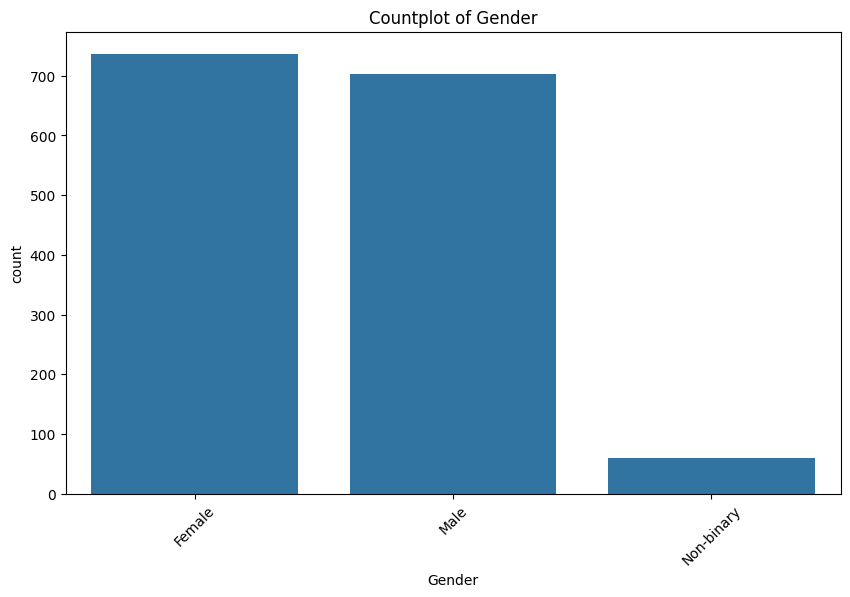

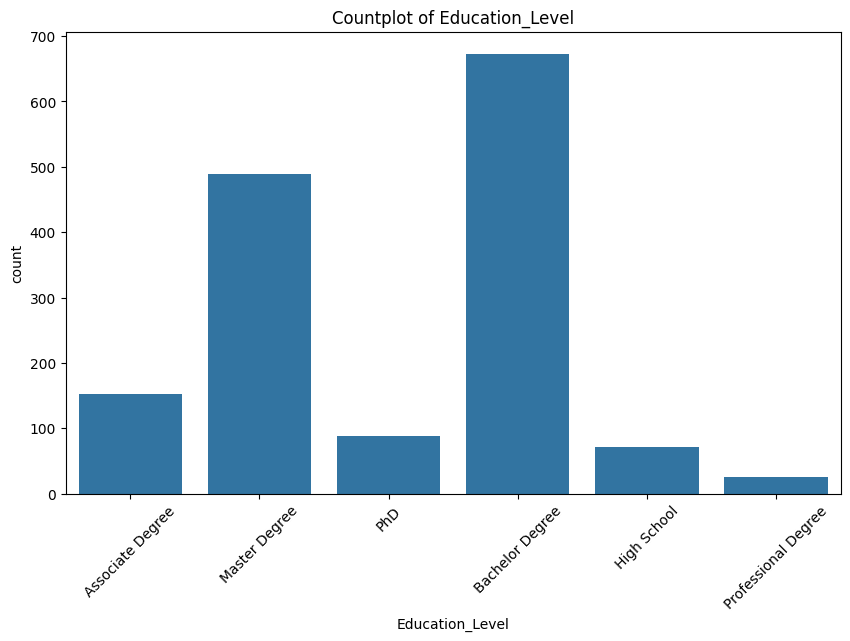

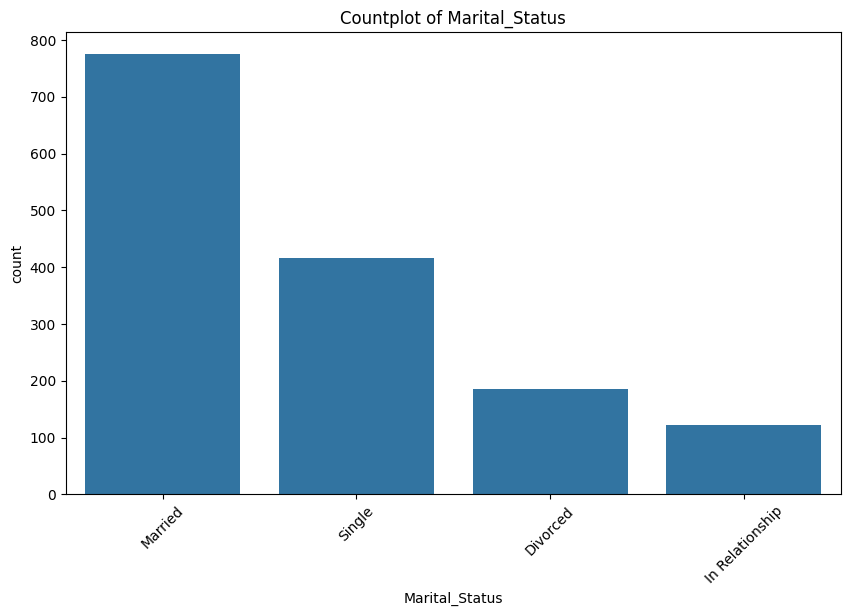

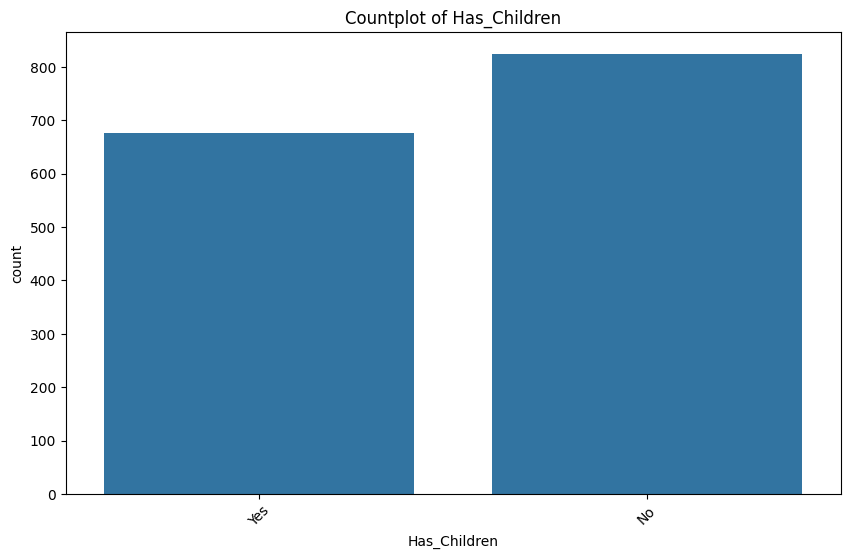

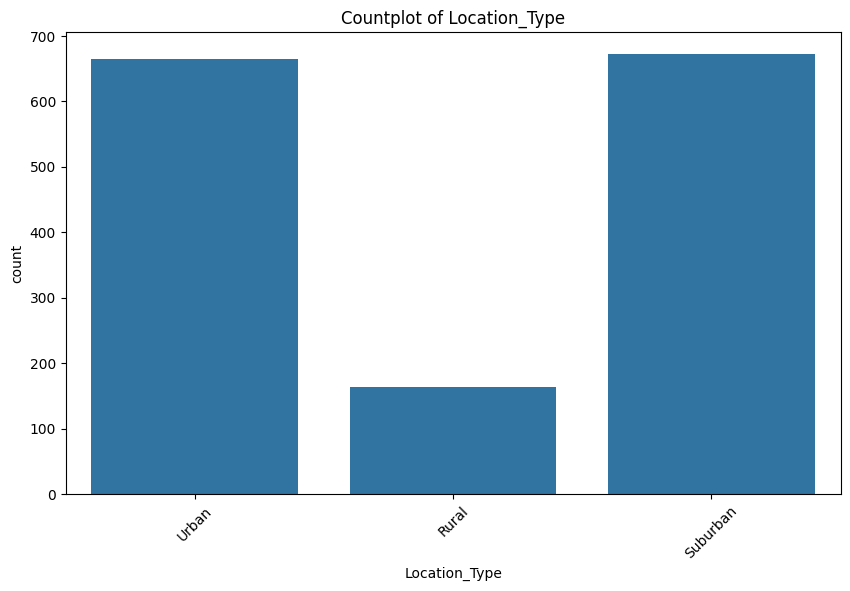

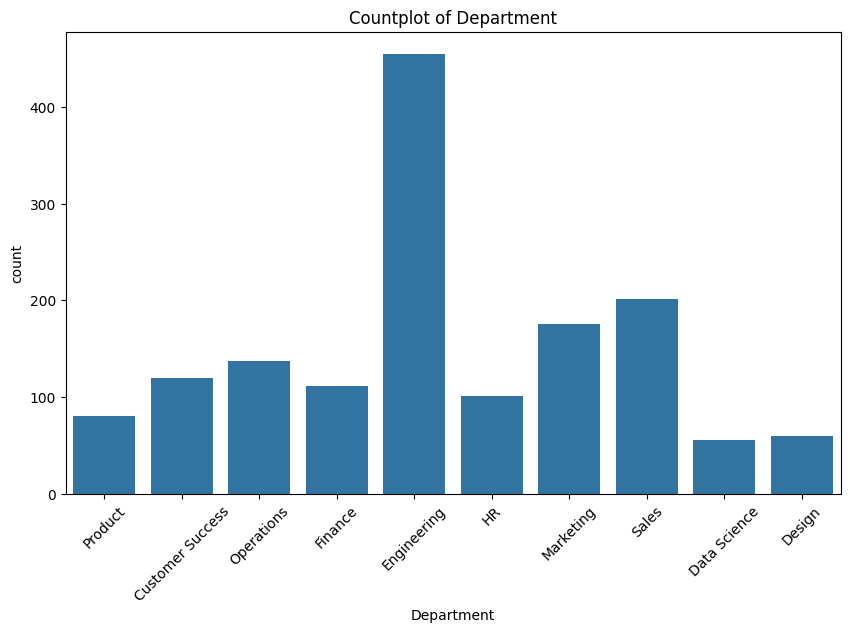

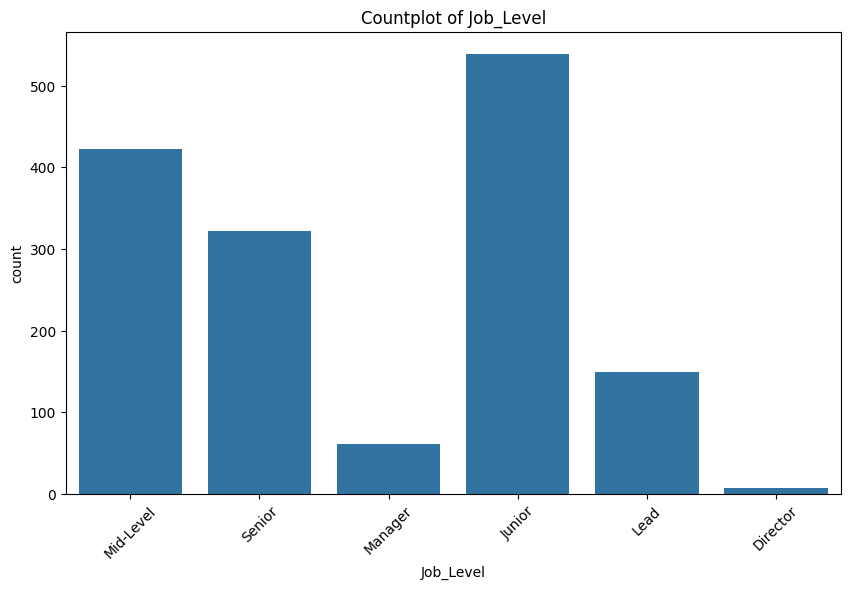

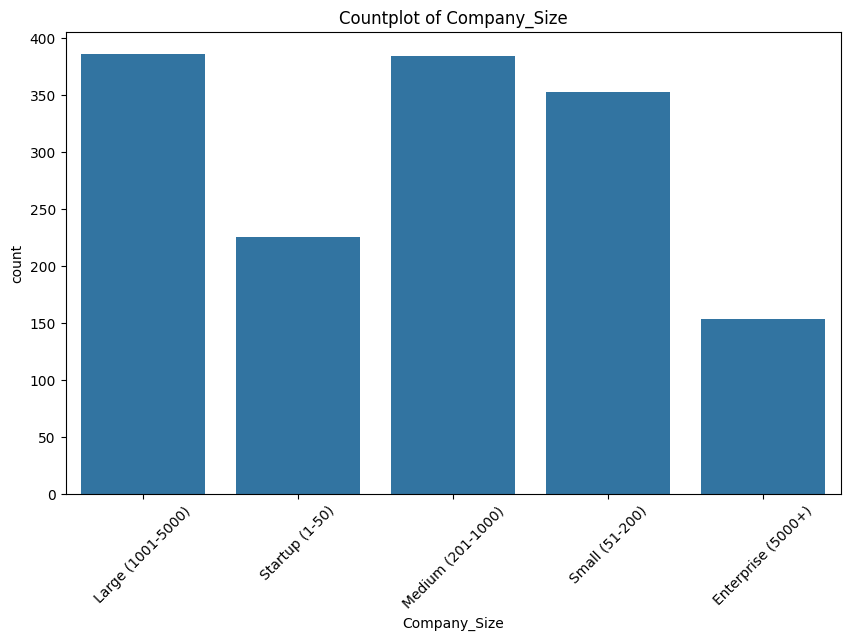

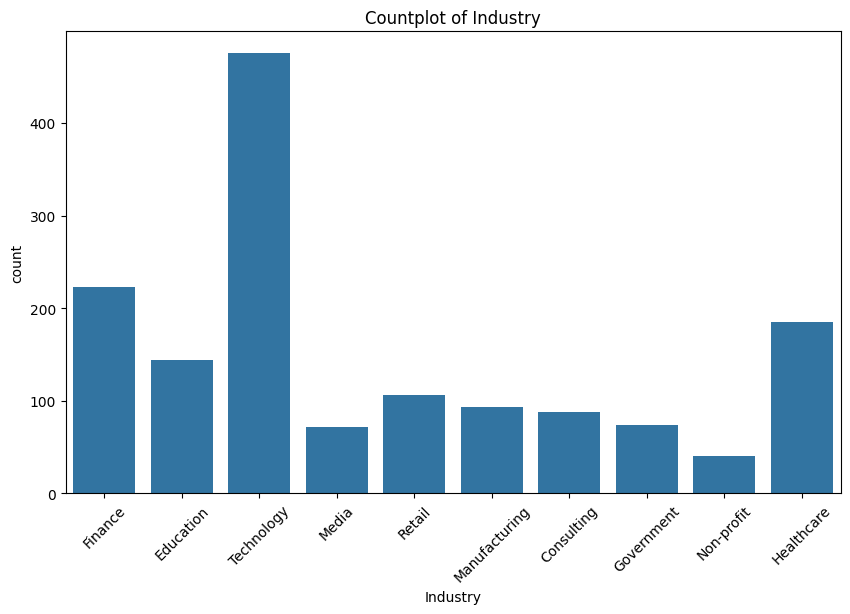

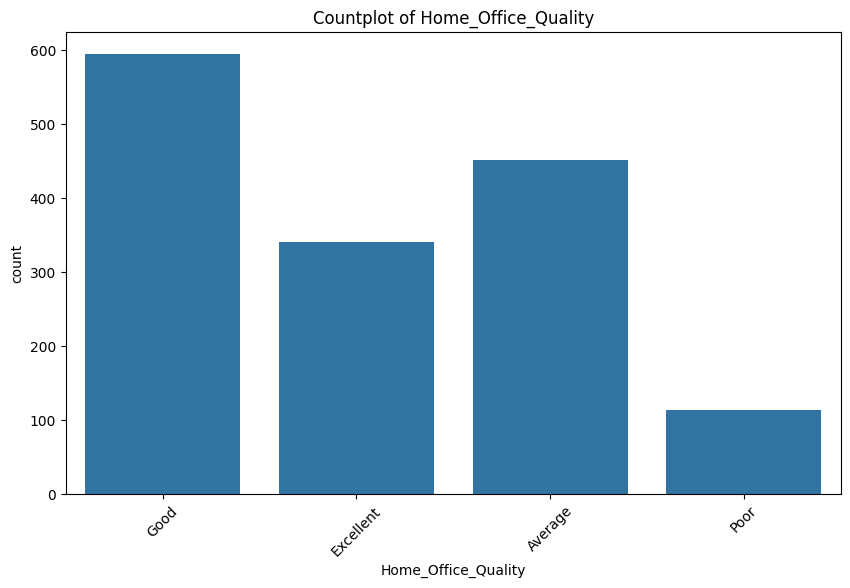

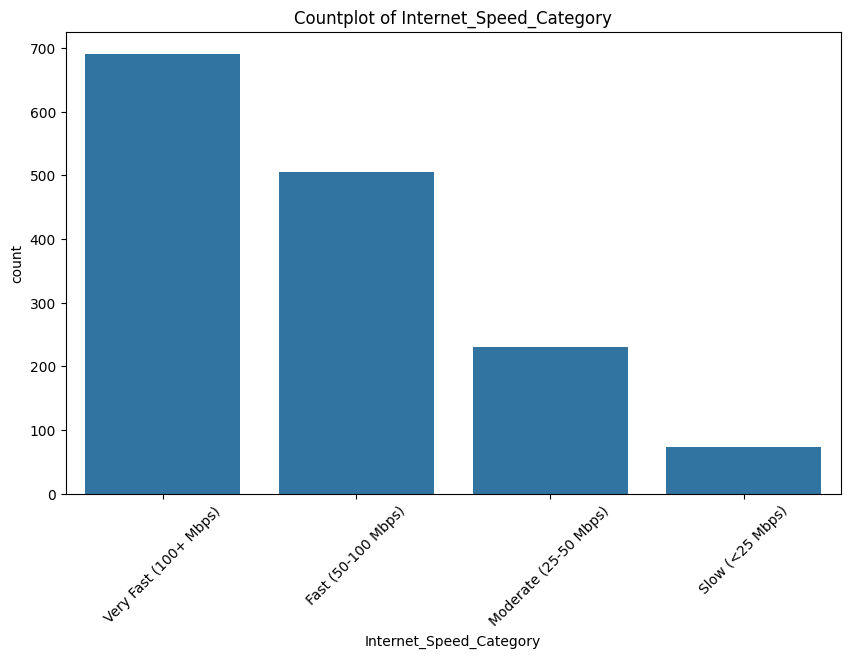

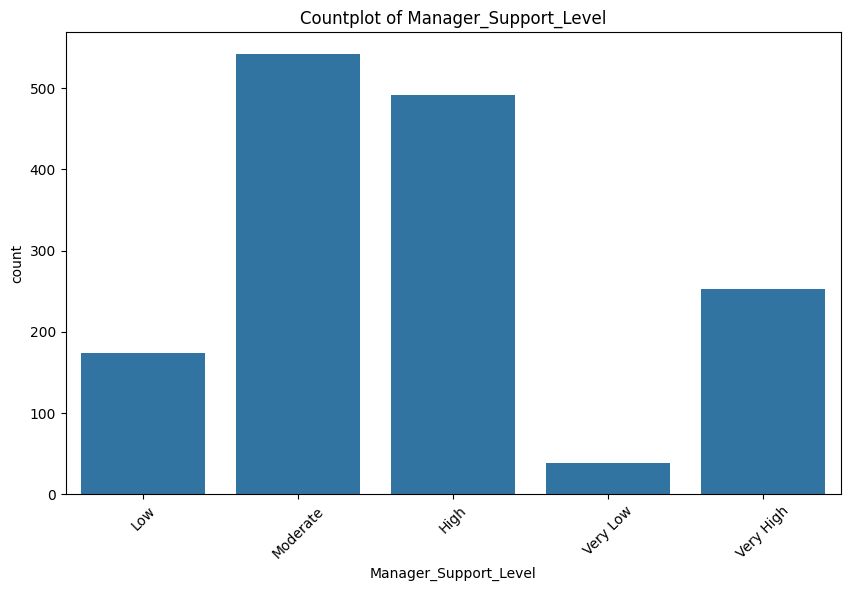

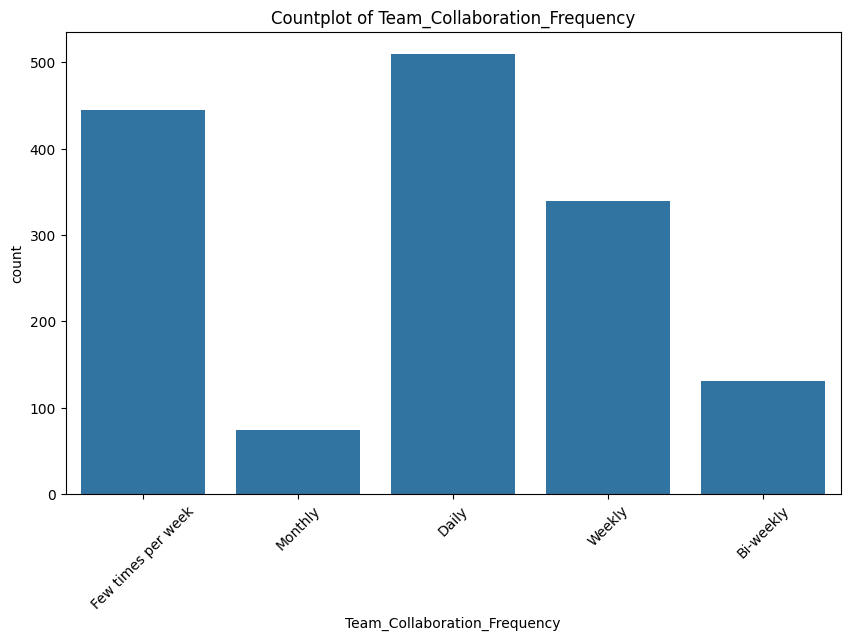

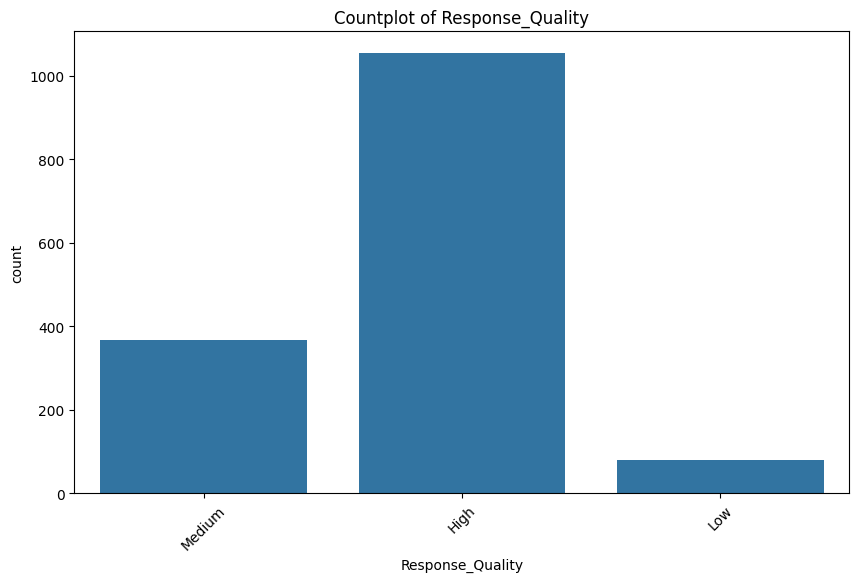

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

# countplot
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

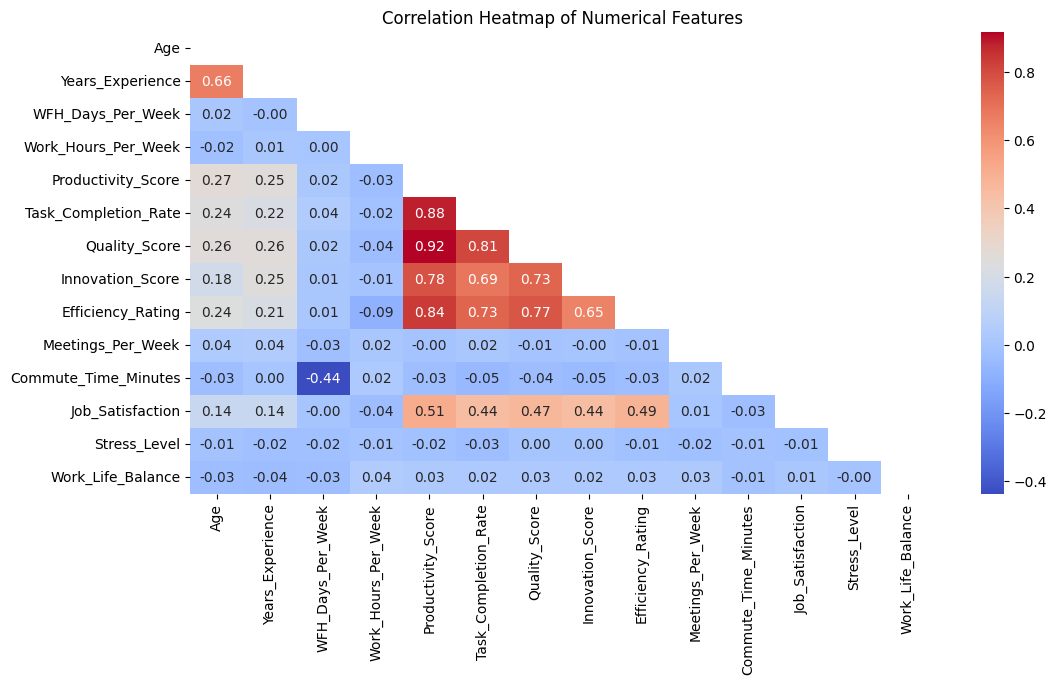

In [10]:
# Correlation heatmap for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
mask = np.triu(df[numerical_cols].corr())
plt.figure(figsize=(12,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

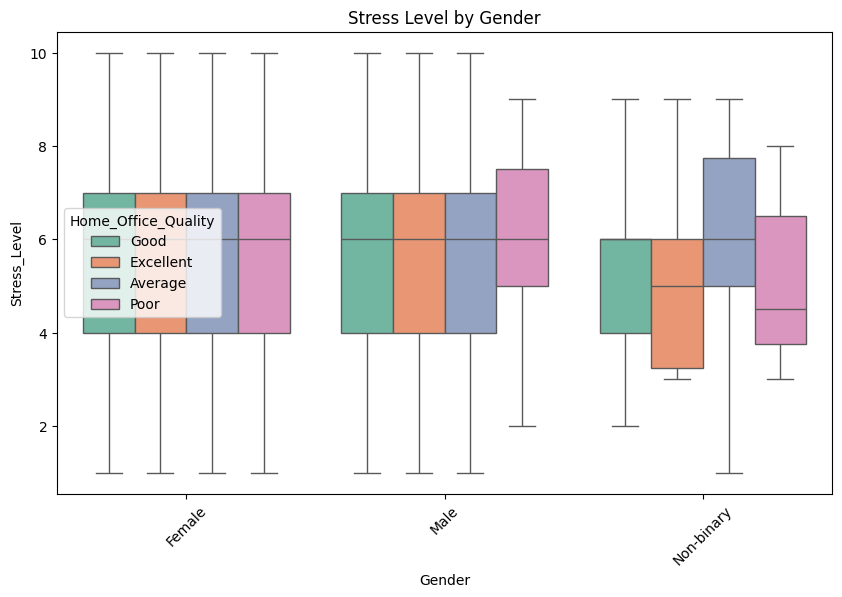

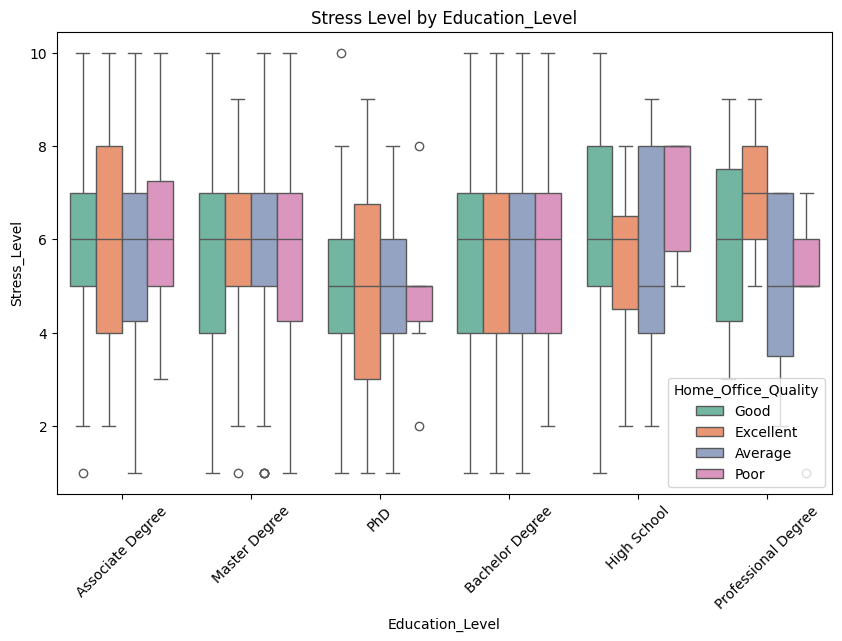

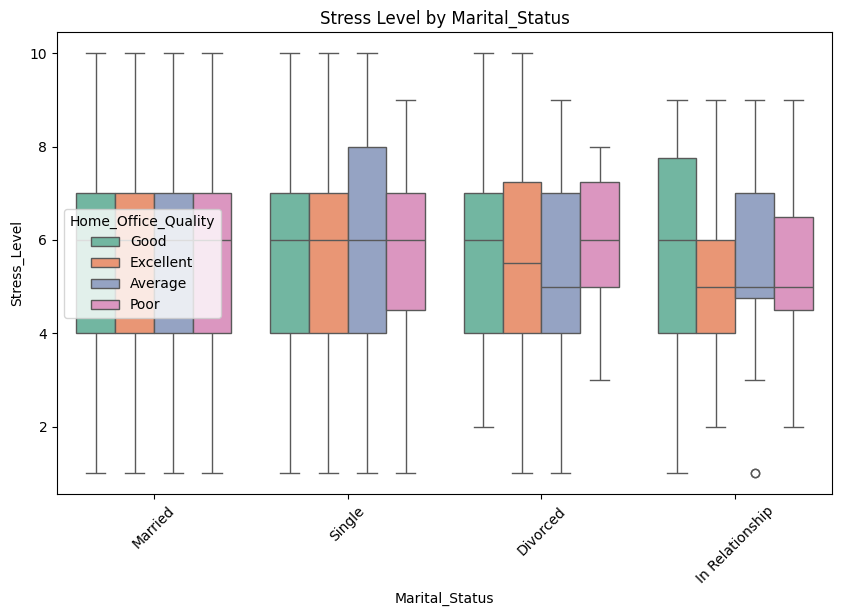

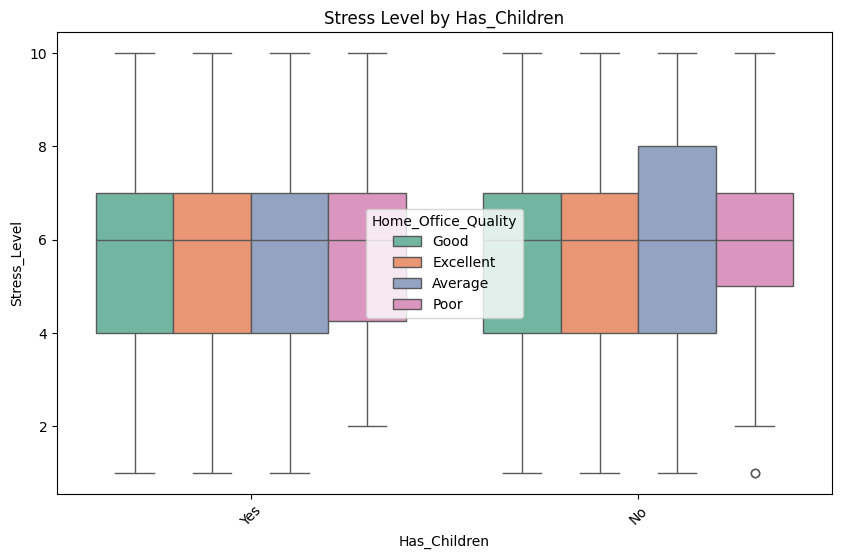

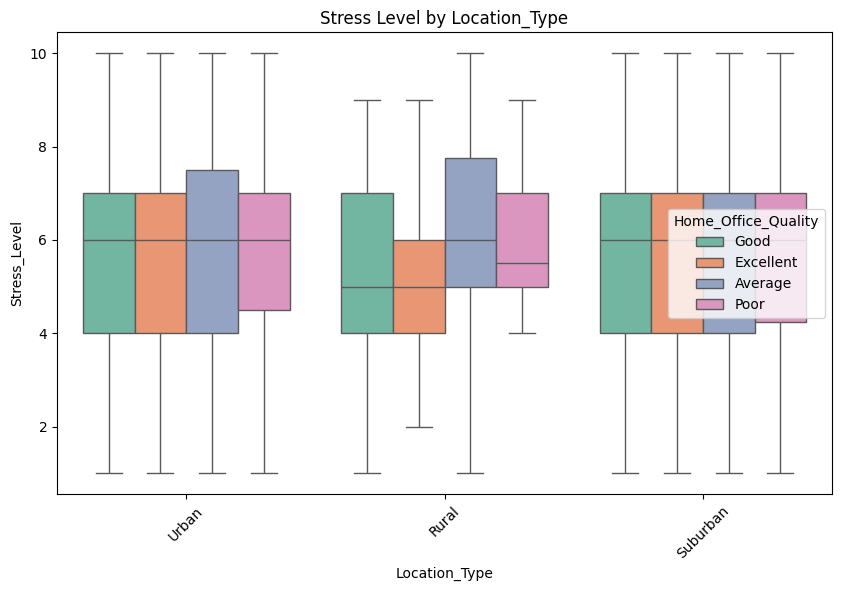

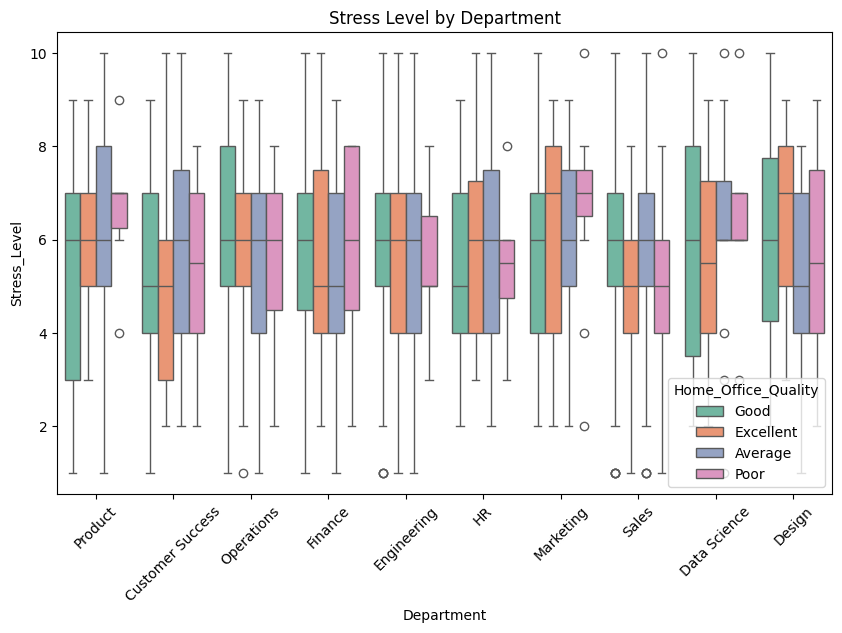

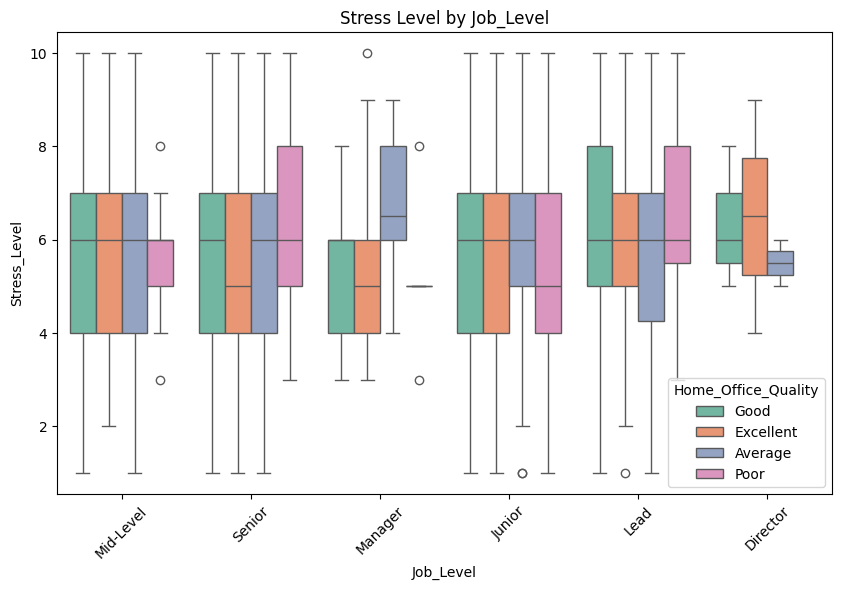

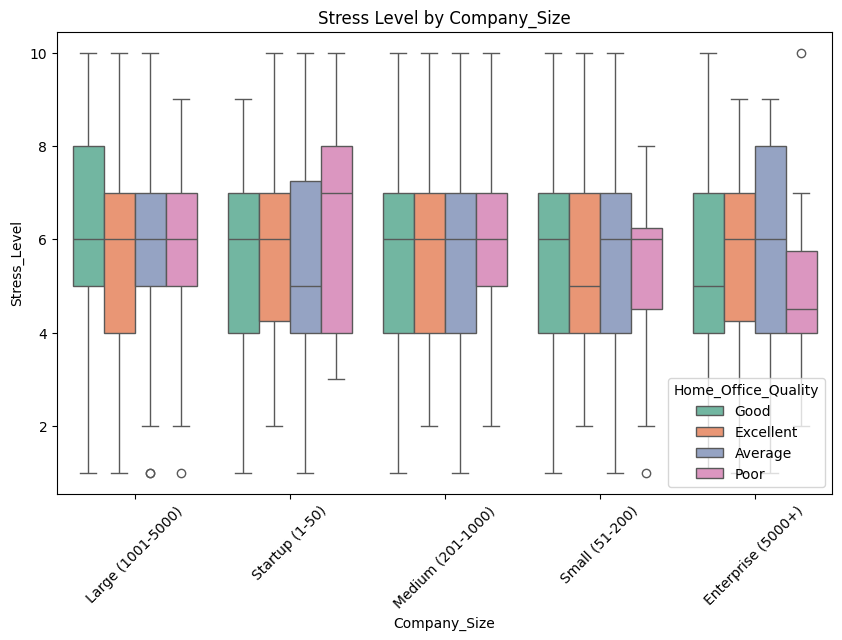

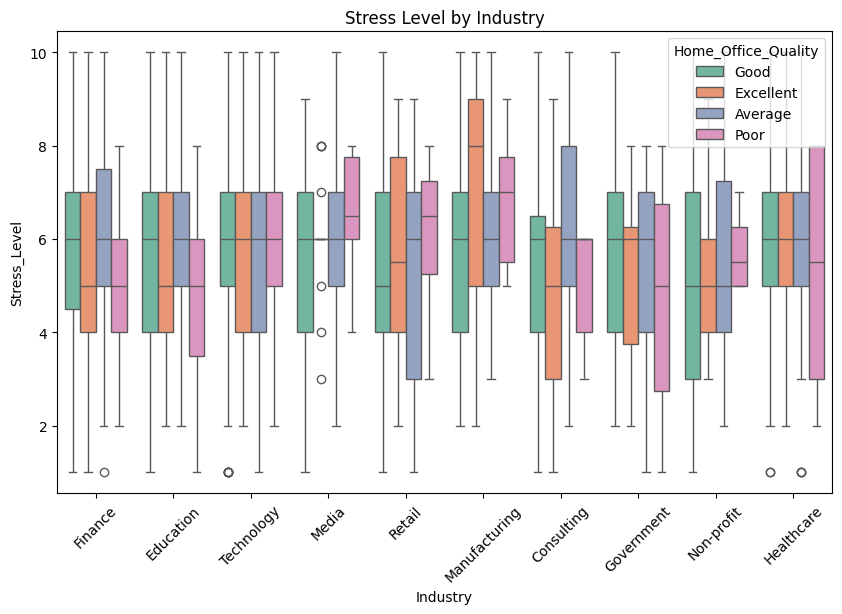

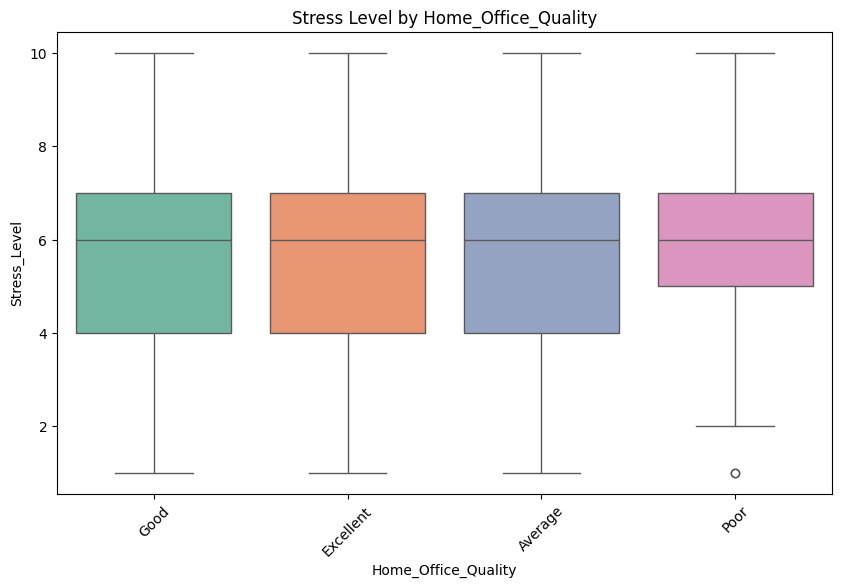

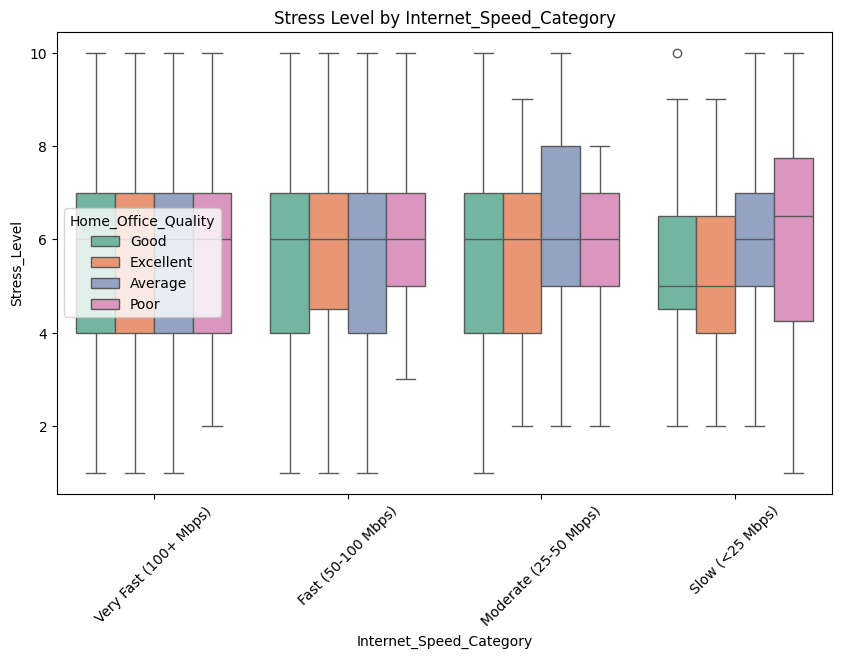

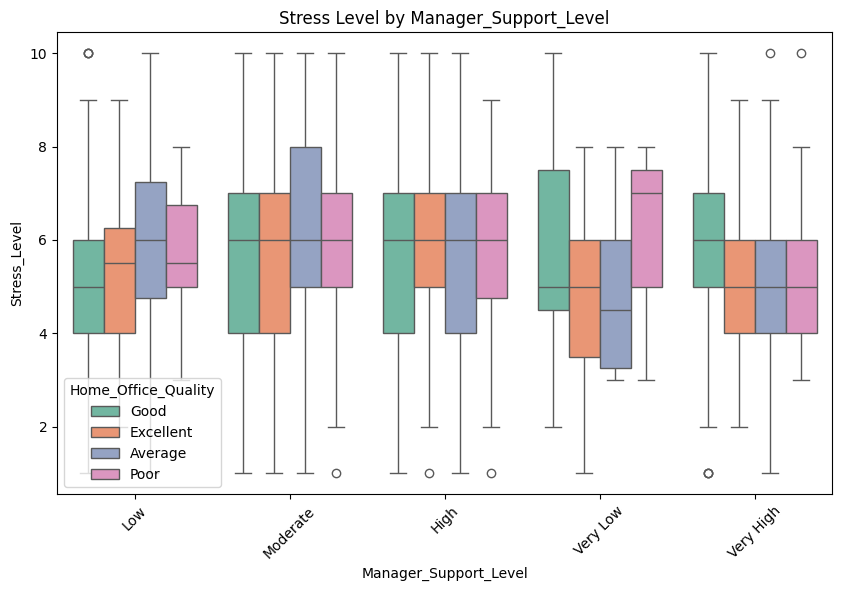

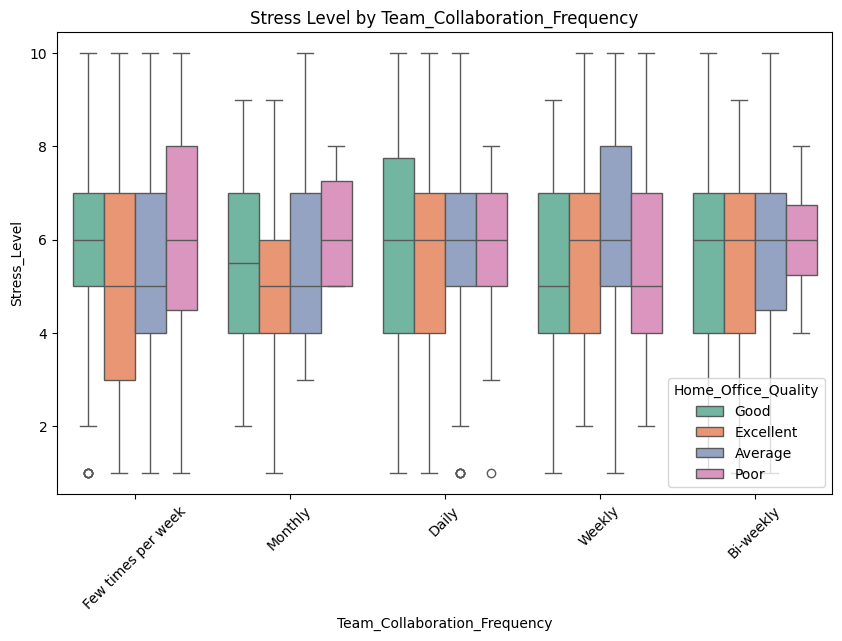

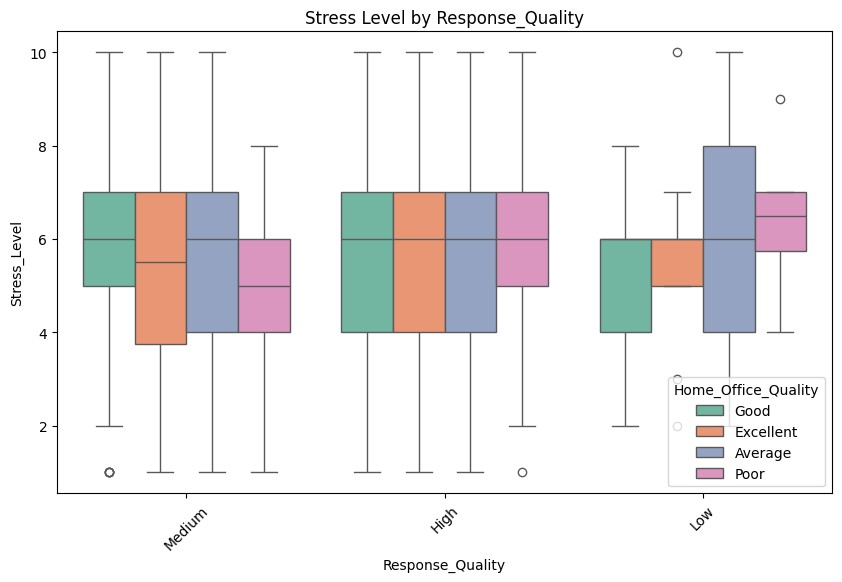

In [11]:
# categorical variables vs stress level
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=col, y='Stress_Level',
                    hue='Home_Office_Quality',
                    palette='Set2')
    plt.title(f'Stress Level by {col}')
    plt.xticks(rotation=45)
    plt.show()